In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=[4])
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv', parse_dates=[5,6])
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=[3,4,5,6,7])
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
prod_categorie = pd.read_csv('product_category_name_translation.csv')

# Sommaire <a class='anchor' id='S'></a>

## [I, Création du DF à partir de la base client](#I)
### [A, Fusion de items et orders](#IA)
### [B, Fusion du df avec products, reviews et customers](#IB)
### [C, Nettoyage des colonnes inutiles](#IC)
### [D, Sélection d'une période cohérente](#ID)

# [II, Transformation des données avec client en clé](#II)
### [A, Extraction des composantes](#IIA)
### [B, Réunion des composantes](#IIB)

# [III, Analyses](#III)
## [A, Première analyse](#IIIA)
## [B, Détection d'outliers avec Isolation Forest](#IIIB)
## [C, Sélection des features pertinentes](#IIIC)

##### [fin de page](#fdp)

In [3]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
customers.shape

(99441, 5)

In [5]:
geolocalisation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [6]:
geolocalisation.shape

(1000163, 5)

In [7]:
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [8]:
items.shape

(112650, 7)

In [9]:
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [10]:
payments.shape

(103886, 5)

In [11]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13


In [12]:
reviews.shape

(100000, 7)

In [13]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [14]:
orders.shape

(99441, 8)

In [15]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [16]:
products.shape

(32951, 9)

In [17]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [18]:
sellers.shape

(3095, 4)

In [19]:
prod_categorie.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [20]:
prod_categorie.shape

(71, 2)

##### [sommaire](#S)

# I, Création du DF à partir de la base client <a class='anchor' id='I'></a>

## A, Fusion de items et orders <a class='anchor' id='IA'></a>

Pour regrouper les données, nous allons partir du df items, qui comprend le détail de chaque commande, sachant qu'une commande peut contenir plusieurs achats.<br/>
Nous allons fusionner ce df avec celui des orders et des products.

In [21]:
# les commandes contenant plus d'un produit
items[items.duplicated('order_id')].shape

(13984, 7)

In [22]:
len(items.order_id.unique())

98666

In [23]:
print("Items shape :",items.shape)
print("orders shape :",orders.shape)

Items shape : (112650, 7)
orders shape : (99441, 8)


In [24]:
df = items.merge(orders, how='left', on='order_id')

In [25]:
print("df shape :",df.shape)

df shape : (112650, 14)


Nouveau DF a des valeurs nulles, la plupart concernan t des commandes en cours et non-finalisées.<br/>
Mais on note également certaines erreurs.

In [26]:
df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

In [27]:
df[df.order_delivered_customer_date.isna()].order_status.unique()

array(['shipped', 'canceled', 'invoiced', 'processing', 'delivered',
       'approved', 'unavailable'], dtype=object)

In [28]:
df[(df.order_delivered_customer_date.isna()) & (df.order_status == 'delivered')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5841,0d3268bad9b086af767785e3f0fc0133,1,ec165cd31c50585786ffda6feff5d0a6,8bdd8e3fd58bafa48af76b2c5fd71974,2018-07-05 21:29:54,188.99,15.63,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
14472,20edc82cf5400ce95e1afacc25798b31,1,55bfa0307d7a46bed72c492259921231,343e716476e3748b069f980efbaa294e,2018-07-03 16:29:30,45.90,9.07,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19
19642,2d1e2d5bf4dc7227b3bfebb81328c15f,1,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2017-12-04 17:56:40,117.30,17.53,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
19838,2d858f451373b04fb5c984a1cc2defaf,1,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.00,15.00,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
20393,2ebdfc4f15f23b91474edf87475f108e,1,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 17:15:12,139.00,19.07,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
75303,ab7c89dc1bf4a1ead9d6ec1ec8968a84,1,a2a7efc985315e86d4f0f705701b342b,ed4acab38528488b65a9a9c603ff024a,2018-06-18 12:30:35,110.99,9.13,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
101642,e69f75a717d64fc5ecdfae42b2e8e086,1,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 22:15:14,139.00,19.07,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
108192,f5dd62b788049ad9fc0526e3ad11a097,1,2167c8f6252667c0eb9edd51520706a1,0bb738e4d789e63e2267697c42d35a2d,2018-06-26 07:19:05,329.00,25.24,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16


In [29]:
# Temporalité du jeu de données, la donnée la plus récente est :
df.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

In [30]:
# 1er tri dans les colonnes

df = df.drop(['order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date', 'order_estimated_delivery_date'], axis=1)


##### [sommaire](#S)

## B, Fusion du df avec products, reviews et customers <a class='anchor' id='IB'></a>

### Fusion avec product

Ensuite, nous allons fusionner ce df avec product, reviews et customer.

In [31]:
print("df shape :",df.shape)
print("products shape :",products.shape)
print("reviews shape :",reviews.shape)
print("customers shape :",customers.shape)

df shape : (112650, 10)
products shape : (32951, 9)
reviews shape : (100000, 7)
customers shape : (99441, 5)


In [32]:
prod = products.loc[:,['product_id', 'product_category_name']]

In [33]:
df = df.merge(prod, how='left', on='product_id')

In [34]:
df.shape

(112650, 11)

### Fusion avec reviews

In [35]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [36]:
reviews = reviews.drop('review_answer_timestamp', axis=1)

In [37]:
df = df.merge(reviews, how='left', on='order_id')

In [38]:
df.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     2475
product_category_name             1612
review_id                            0
review_score                         0
review_comment_title             99700
review_comment_message           64730
review_creation_date                 0
dtype: int64

In [39]:
df.shape

(113322, 16)

On note que le df fusionné avec reviews contient 672 lignes de plus qu'avant. Cela signifie que certaines commandes on plusieurs avis **pour le même produit**.<br/>


In [40]:
df[df.duplicated(subset=['order_id', 'order_item_id'])].shape

(672, 16)

In [41]:
liste = df[df.duplicated(subset=['order_id', 'order_item_id'])].order_id.unique()

In [42]:
len(liste)

552

In [43]:
prov_initial = df[df.order_id.isin(liste)]

In [44]:
prov_initial.shape

(1338, 16)

In [45]:
prov = prov_initial.copy()

In [46]:
# On garde la ligne avec le plus d'informations
for i in prov.order_id.unique():
    temp = prov[prov.order_id == i]
    for j in temp.order_item_id:
        temp = temp[temp.order_item_id == j]
        temp = temp[~(temp.isna().sum(axis=1) == temp.isna().sum(axis=1).min())]
        prov = prov[~prov.index.isin(temp.index)]
print(prov.shape)  

(1229, 16)


In [47]:
# On garde la ligne la plus récente
for i in prov.order_id.unique():
    temp = prov[prov.order_id == i]
    for j in temp.order_item_id:
        temp = temp[temp.order_item_id == j]
        temp = temp[~(temp.review_creation_date == temp.review_creation_date.max())]
        prov = prov[~prov.index.isin(temp.index)]
    
print(prov.shape) 

(917, 16)


In [48]:
# Les doublons qui restent peuvent êtr considérés comme de "vrai doublons, donc nous les supprimons"

prov = prov.drop_duplicates(subset=['order_id', 'order_item_id'], keep='last')

print(prov.shape)

(666, 16)


In [49]:
df2 = df[~df.index.isin(prov_initial.index)]

In [50]:
df2.shape

(111984, 16)

In [51]:
df2 = pd.concat([df2, prov])

In [52]:
df2.shape

(112650, 16)

In [53]:
df = df2.copy()

### Fusion avec customers

In [54]:
df.shape

(112650, 16)

In [55]:
df = df.merge(customers, how='left', on='customer_id')

In [56]:
df.shape

(112650, 20)

In [57]:
df.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     2454
product_category_name             1603
review_id                            0
review_score                         0
review_comment_title             99045
review_comment_message           64244
review_creation_date                 0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
dtype: int64

### Fusion avec payments

In [58]:
pay_type = payments.copy()

In [59]:
pay_type = pay_type.loc[:,['order_id', 'payment_type']]

In [60]:
pay_type = pay_type.drop_duplicates('order_id')

In [61]:
pay_type.head(2)

,order_id,payment_type
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card


In [62]:
df = df.merge(pay_type, how='left', on='order_id')

In [63]:
df.shape

(112650, 21)

In [64]:
df.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     2454
product_category_name             1603
review_id                            0
review_score                         0
review_comment_title             99045
review_comment_message           64244
review_creation_date                 0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
payment_type                         3
dtype: int64

In [65]:
df[df.payment_type.isna()]

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_type
83876,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,...,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN
83877,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,...,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN
83878,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,...,6916ca4502d6d3bfd39818759d55d536,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,NaN


##### [sommaire](#S)

## C, Nettoyage des colonnes inutiles <a class='anchor' id='IC'></a>

In [66]:
df.isna().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     2454
product_category_name             1603
review_id                            0
review_score                         0
review_comment_title             99045
review_comment_message           64244
review_creation_date                 0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
payment_type                         3
dtype: int64

In [67]:
data = df.drop(['order_id', 'order_item_id', 'product_id', 'seller_id', 'customer_id', 'review_id', 
         'review_creation_date', 'customer_zip_code_prefix', 'customer_city', 'review_comment_title',
                'review_comment_message', 'freight_value'], axis=1)

#### On ne garde que les commandes livrées

In [68]:
data.order_status.unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [69]:
data.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

In [70]:
data = data[data.order_status == 'delivered']

In [71]:
data = data.drop('order_status', axis=1)

#### On écarte les données manquantes pour les colonnes paiement et catégorie de produits

In [72]:
data = data[~data.payment_type.isna()]

In [73]:
data.isna().sum()

price                               0
order_purchase_timestamp            0
order_delivered_customer_date       8
product_category_name            1537
review_score                        0
customer_unique_id                  0
customer_state                      0
payment_type                        0
dtype: int64

In [74]:
data = data[~data.product_category_name.isna()]

In [75]:
data.reset_index(drop=True, inplace=True)

In [76]:
data.head(2)

,price,order_purchase_timestamp,order_delivered_customer_date,product_category_name,review_score,customer_unique_id,customer_state,payment_type
0,58.9,2017-09-13 08:59:02,2017-09-20 23:43:48,cool_stuff,5,871766c5855e863f6eccc05f988b23cb,RJ,credit_card
1,239.9,2017-04-26 10:53:06,2017-05-12 16:04:24,pet_shop,4,eb28e67c4c0b83846050ddfb8a35d051,SP,credit_card


##### [sommaire](#S)

## D, Séléction d'une période cohérente <a class='anchor' id='ID'></a>

In [77]:
data.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

In [78]:
data.order_purchase_timestamp.min()

Timestamp('2016-10-03 09:44:50')

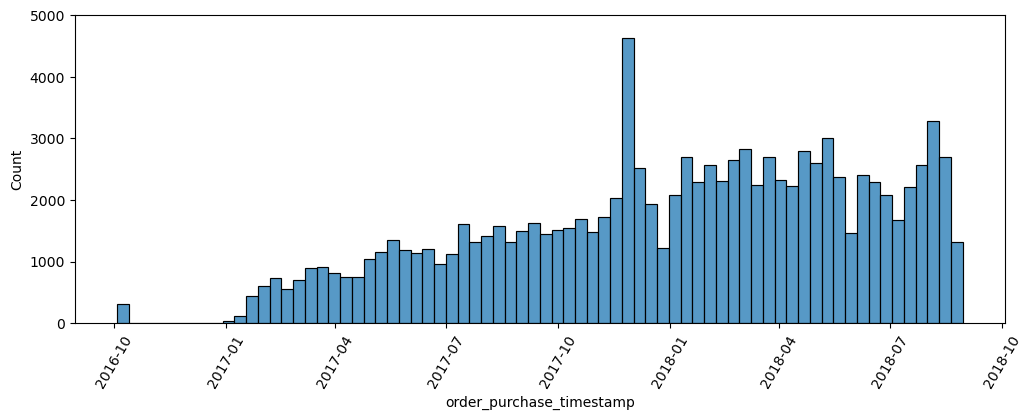

In [79]:
import datetime as dt

plt.figure(figsize=(12,4))
sns.histplot(x='order_purchase_timestamp', data=data)
plt.ylim(0,5000)
plt.xticks(rotation=60)
#plt.savefig("repartition_des_données_dans_le_temps.png", bbox_inches='tight', transparent=True)
plt.show()

On voit que l'on dispose de très peu de données sur l'année 2016.
Aussi, pour pouvoir effectuer une analyse pertinente sur une temporalité cohérente, nous allons travailler sur l'année 2017.

In [80]:
df = data[(data.order_purchase_timestamp >= '2017-01-01') & (data.order_purchase_timestamp <= '2017-12-31')]

In [81]:
df.shape

(48611, 8)

In [82]:
data.to_csv('data_regroupee.csv')

##### [sommaire](#S)

# II, Transformation des données avec client en clé <a class='anchor' id='II'></a>

## A, Extraction des composantes <a class='anchor' id='IIA'></a>

In [83]:
# Création d'une date de positionnement à partir de delivery date
from datetime import timedelta

snapshot_date = df.order_delivered_customer_date.max() + timedelta(days=1)
print(snapshot_date)

2018-05-22 18:22:18


#### Composantes temporelles

In [84]:
duree = df.pivot_table(index='customer_unique_id', values='order_purchase_timestamp', aggfunc=['min', 'max'], dropna=False)

In [85]:
duree['time_since_first_purchase_(days)'] = (snapshot_date - duree['min']['order_purchase_timestamp']).dt.days
duree['time_since_last_purchase_(days)'] = (snapshot_date - duree['max']['order_purchase_timestamp']).dt.days

In [86]:
duree['date_first_purchase'] = duree['min']['order_purchase_timestamp']
duree['date_last_purchase'] = duree['max']['order_purchase_timestamp']
duree = duree.iloc[:,4:]
duree.columns = duree.columns.get_level_values(0)

In [87]:
duree.head(2)

,date_first_purchase,date_last_purchase
customer_unique_id,,
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41


In [88]:
df2 = df.copy()

In [89]:
df2['delivery_time'] = (df2.order_delivered_customer_date - df2.order_purchase_timestamp).dt.days

In [90]:
delivery = df2.pivot_table(index='customer_unique_id', values='delivery_time', aggfunc='mean')

In [91]:
delivery.head(2)

,delivery_time
customer_unique_id,
0000f46a3911fa3c0805444483337064,25.0
0000f6ccb0745a6a4b88665a16c9f078,20.0


#### Composantes monétaires

In [92]:
prix = df.pivot_table(index='customer_unique_id', values='price', aggfunc=['min', 'max', 'sum'], dropna=False)

In [93]:
prix['min_purchase_amount'] = prix['min']['price']
prix['max_purchase_amount'] = prix['max']['price']
prix['total_purchase_amount'] = prix['sum']['price']
prix = prix.iloc[:,3:]
prix.columns = prix.columns.get_level_values(0)

In [94]:
prix

,min_purchase_amount,max_purchase_amount,total_purchase_amount
customer_unique_id,,,
0000f46a3911fa3c0805444483337064,69.00,69.00,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99,25.99,25.99
0004aac84e0df4da2b147fca70cf8255,180.00,180.00,180.00
0005e1862207bf6ccc02e4228effd9a0,135.00,135.00,135.00
0006fdc98a402fceb4eb0ee528f6a8d4,13.90,13.90,13.90
...,...,...,...
fffb09418989a0dbff854a28163e47c6,58.00,58.00,58.00
fffcf5a5ff07b0908bd4e2dbc735a684,680.00,890.00,1570.00
fffea47cd6d3cc0a88bd621562a9d061,64.89,64.89,64.89


#### Composantes sur les avis

In [95]:
avis = df.pivot_table(index='customer_unique_id', values='review_score', aggfunc=['count', 'mean'], dropna=False)

In [96]:
avis.columns = ["_".join(col).strip() for col in avis.columns.values]

In [97]:
avis.head(2)

,count_review_score,mean_review_score
customer_unique_id,,
0000f46a3911fa3c0805444483337064,1,3.0
0000f6ccb0745a6a4b88665a16c9f078,1,4.0


#### Composantes sur les catégories

In [98]:
df2['cat_count'] = 1

In [99]:
cat_prod = df2.pivot_table(index='customer_unique_id', columns='product_category_name', values='cat_count', aggfunc='sum', margins='all', margins_name='total_purchase_count')
cat_prod = cat_prod.iloc[:-1,:]
cat_prod = cat_prod.fillna(0)

In [100]:
liste = []
for i in cat_prod.index:
    temp = cat_prod.loc[i,:]
    liste.append(temp[temp == temp.max()].index[0])

In [101]:
cat_prod['item_most_purchase'] = liste

In [102]:
cat_prod = cat_prod.iloc[:,-2:]

In [103]:
cat_prod.head(2)

product_category_name,total_purchase_count,item_most_purchase
customer_unique_id,,
0000f46a3911fa3c0805444483337064,1,papelaria
0000f6ccb0745a6a4b88665a16c9f078,1,telefonia


#### Autres composantes

In [104]:
liste = ['customer_unique_id', 'customer_state', 'payment_type']

In [105]:
autre = df.loc[:,liste]

In [106]:
autre = autre.drop_duplicates(subset='customer_unique_id')

##### [sommaire](#S)

## B, Réunion des composantes <a class='anchor' id='IIB'></a>

In [107]:
df = pd.concat([duree, delivery, prix, avis, cat_prod], axis=1)

In [108]:
df = pd.merge(df, autre, how='left', on='customer_unique_id')

In [109]:
df.isna().sum()

customer_unique_id       0
date_first_purchase      0
date_last_purchase       0
delivery_time            2
min_purchase_amount      0
max_purchase_amount      0
total_purchase_amount    0
count_review_score       0
mean_review_score        0
total_purchase_count     0
item_most_purchase       0
customer_state           0
payment_type             0
dtype: int64

In [110]:
df.delivery_time.mean()

12.56335589830946

In [111]:
df = df.fillna(12)

In [112]:
df.head(2)

,customer_unique_id,date_first_purchase,date_last_purchase,delivery_time,min_purchase_amount,max_purchase_amount,total_purchase_amount,count_review_score,mean_review_score,total_purchase_count,item_most_purchase,customer_state,payment_type
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,25.0,69.00,69.00,69.00,1,3.0,1,papelaria,SC,credit_card
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,20.0,25.99,25.99,25.99,1,4.0,1,telefonia,PA,credit_card


##### [sommaire](#S)

# III, Analyses <a class='anchor' id='III'></a>

In [113]:
df.set_index('customer_unique_id', drop=True, inplace=True)

## A, Première analyse <a class='anchor' id='IIIA'></a>

In [114]:
df.dtypes

date_first_purchase      datetime64[ns]
date_last_purchase       datetime64[ns]
delivery_time                   float64
min_purchase_amount             float64
max_purchase_amount             float64
total_purchase_amount           float64
count_review_score                int64
mean_review_score               float64
total_purchase_count              int64
item_most_purchase               object
customer_state                   object
payment_type                     object
dtype: object

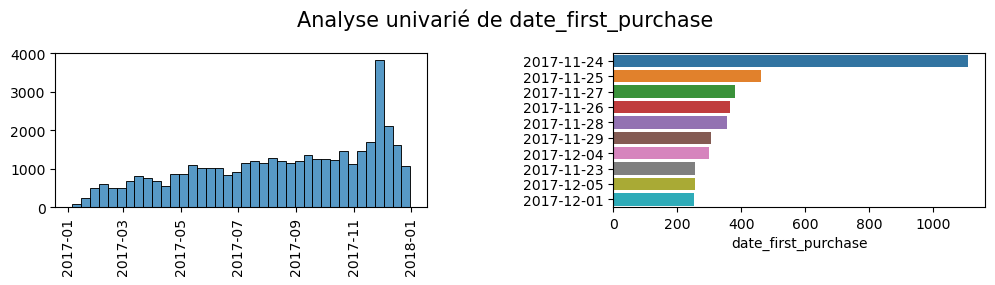

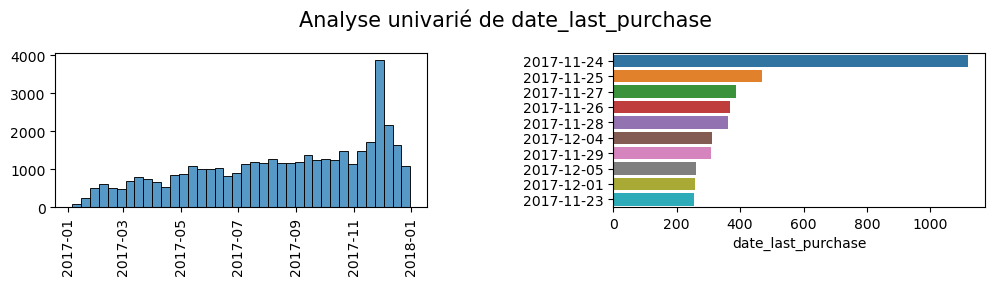

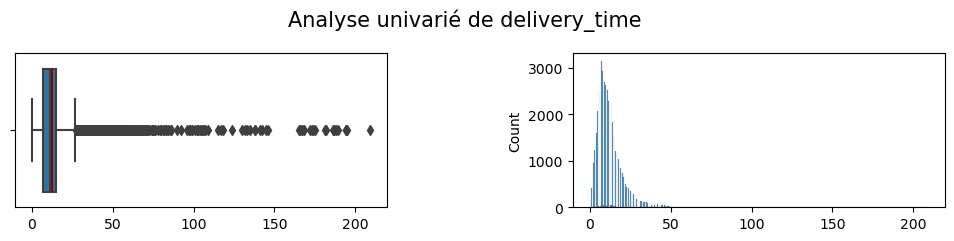

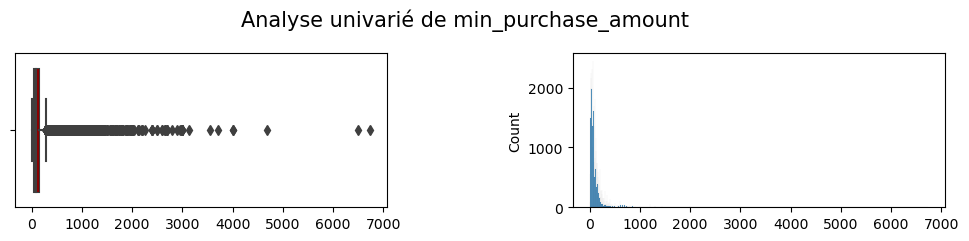

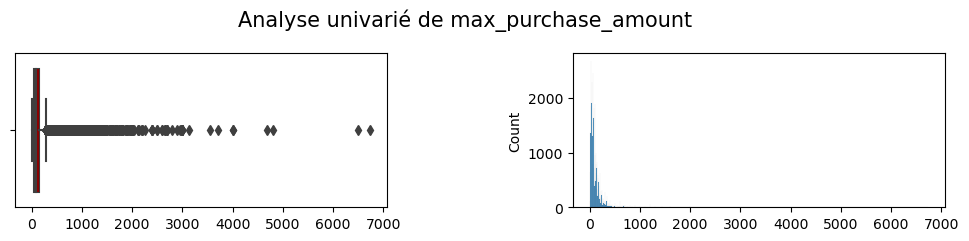

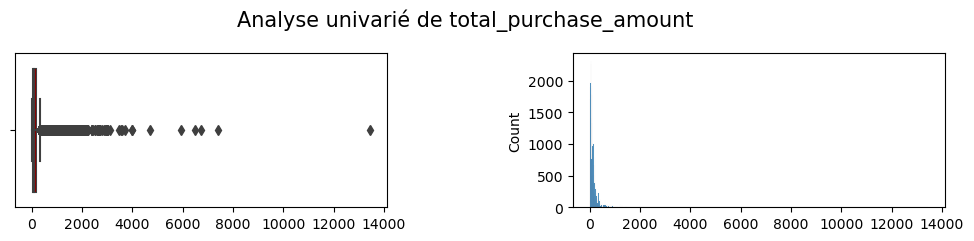

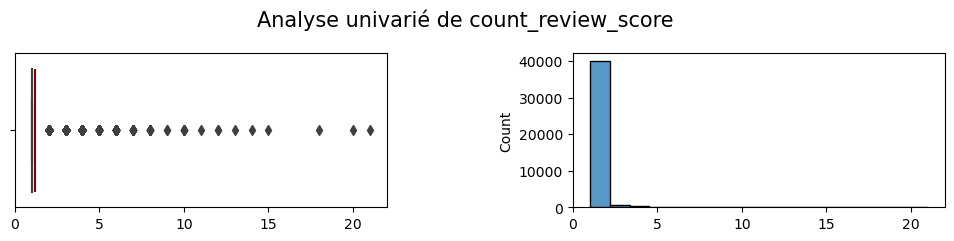

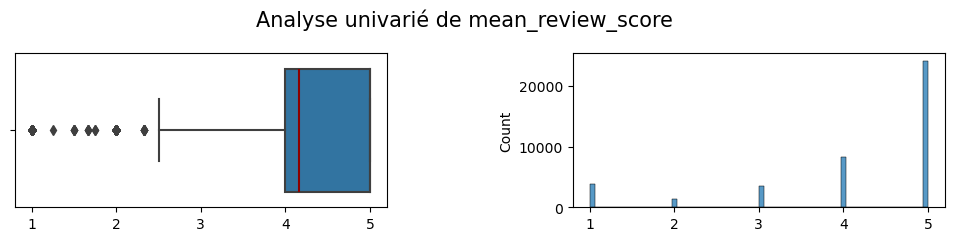

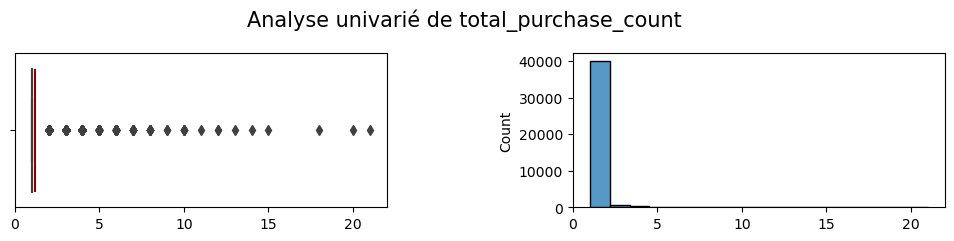

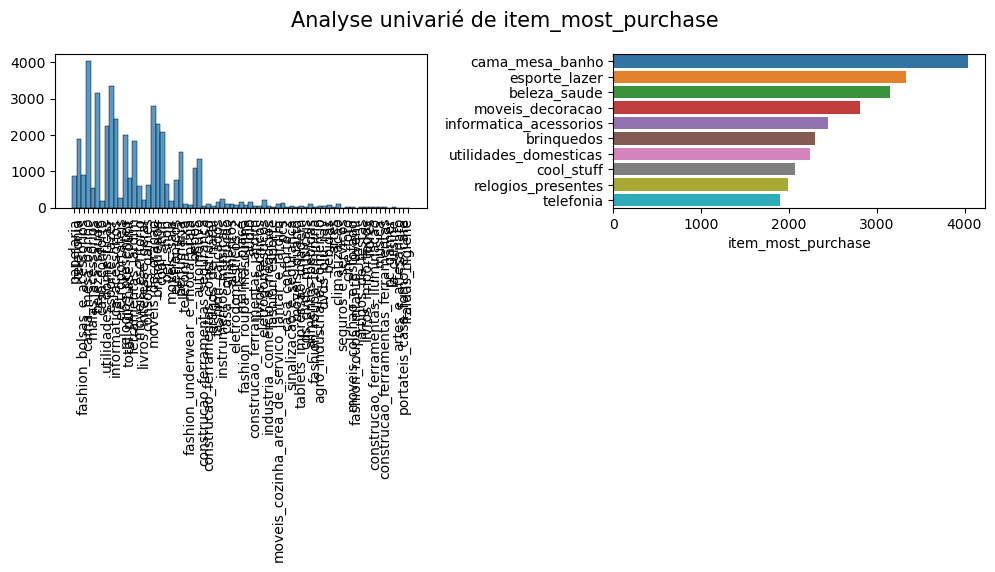

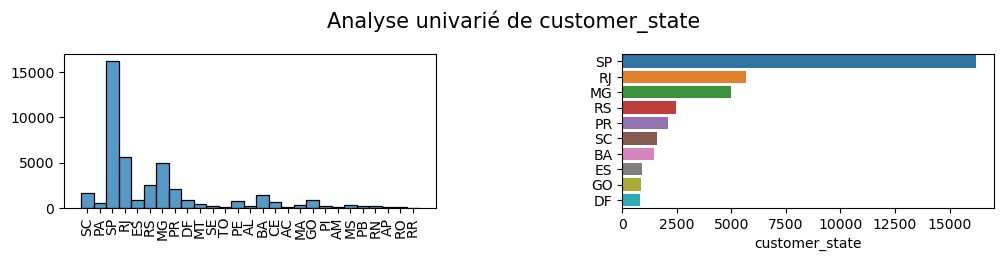

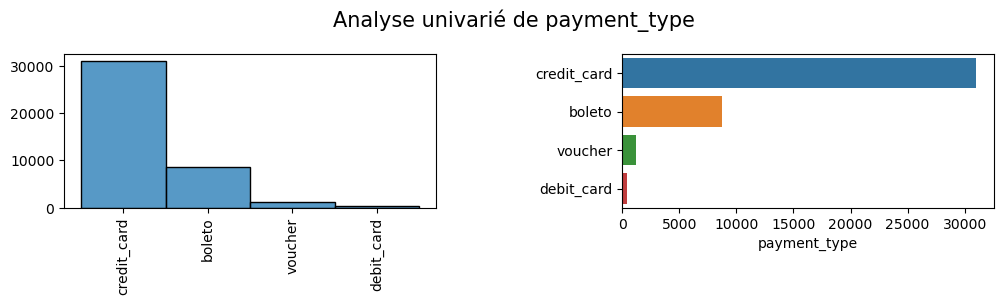

In [115]:
for c in df.columns:
    if c == 'customer_unique_id':
        continue
    if (df[c].dtypes == 'float64') | (df[c].dtypes == 'int64'):
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
        plt.subplots_adjust(wspace=0.5)
        plt.suptitle('Analyse univarié de {}'.format(c), fontsize=15, y=1.1)
        g1 = sns.boxplot(x=c, data=df, ax=ax[0])
        g1.vlines(df[c].mean(), ymin=-0.4, ymax=0.4, color='darkred')
        g1.set(xlabel=None)
        g2 = sns.histplot(x=c, data=df, ax=ax[1])
        g2.set(xlabel=None)
        #plt.savefig("analyse_univariee_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()
    else:
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
        plt.subplots_adjust(wspace=0.5)
        plt.suptitle('Analyse univarié de {}'.format(c), fontsize=15, y=1.1)
        g1 = sns.histplot(x=c, data=df, ax=ax[0])
        plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
        g1.set(xlabel=None, ylabel=None)
        if ('time' in c) | ('date' in c):
            temp = pd.DataFrame(df[c].dt.date.value_counts())
            temp = temp.iloc[:10,:] 
        else:
            temp = pd.DataFrame(df[c].value_counts())
            temp = temp.iloc[:10,:]
        g2 = sns.barplot(x=c, y=temp.index, data=temp, ax=ax[1])
        #plt.savefig("analyse_univariee_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

In [116]:
amount = []
for c in df.columns:
    if 'amount' in c:
        amount.append(c)
amount = df.loc[:,amount]

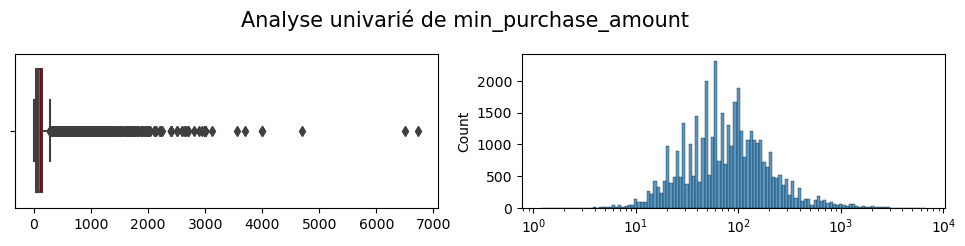

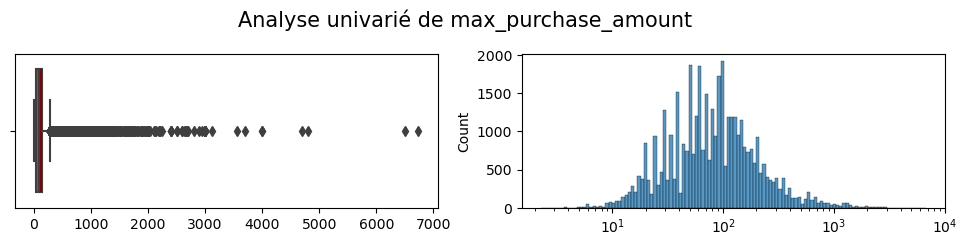

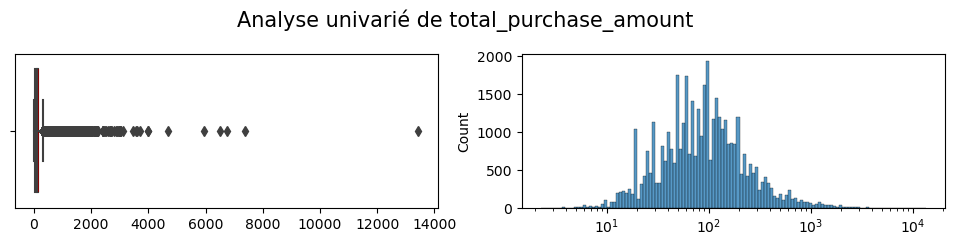

In [117]:
for c in amount.columns:
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
    plt.suptitle('Analyse univarié de {}'.format(c), fontsize=15, y=1.1)
    g1 = sns.boxplot(x=c, data=amount, ax=ax[0])
    g1.vlines(amount[c].mean(), ymin=-0.4, ymax=0.4, color='darkred')
    g1.set(xlabel=None)
    g2 = sns.histplot(x=c, data=amount,log_scale=True, ax=ax[1])
    g2.set(xlabel=None)
    #plt.savefig("analyse_univariee_log_"+c+".png", bbox_inches='tight', transparent=True)
    plt.show()

##### [sommaire](#S)

## B, Détection d'outliers avec Isolation Forest <a class='anchor' id='IIIB'></a>

In [118]:
df_if = df.copy()

In [119]:
df_if.reset_index(inplace=True)

In [120]:
df_if2 = df_if.copy()

In [121]:
df_if.drop(['customer_unique_id', 'date_first_purchase', 'date_last_purchase'], inplace=True, axis=1)

In [122]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [123]:
ifr = IsolationForest(bootstrap=True, contamination=0.1)

In [124]:
for c in df_if.columns:
    if df_if[c].dtypes == 'object':
        le = LabelEncoder()
        df_if[c] = le.fit_transform(df_if[c])

In [125]:
df_if2['iforest'] = ifr.fit_predict(df_if)

In [126]:
df_if2.iforest.value_counts()

 1    37218
-1     4136
Name: iforest, dtype: int64

In [127]:
df_if2 = df_if2[df_if2.iforest == 1]

In [128]:
df_if2 = df_if2.drop('iforest', axis=1)

In [129]:
df_if2.set_index('customer_unique_id', inplace=True)

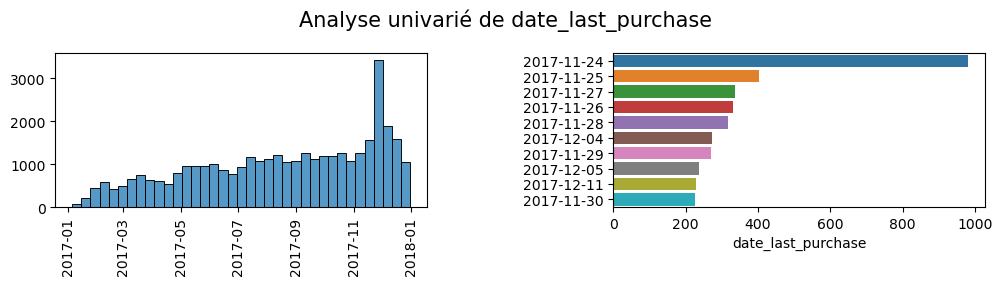

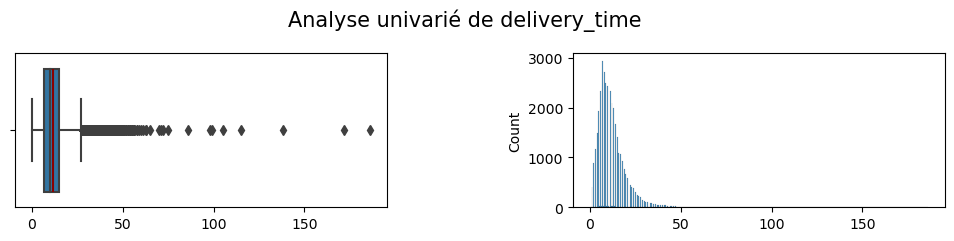

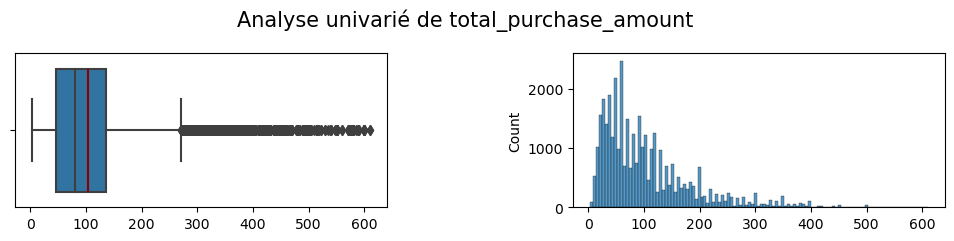

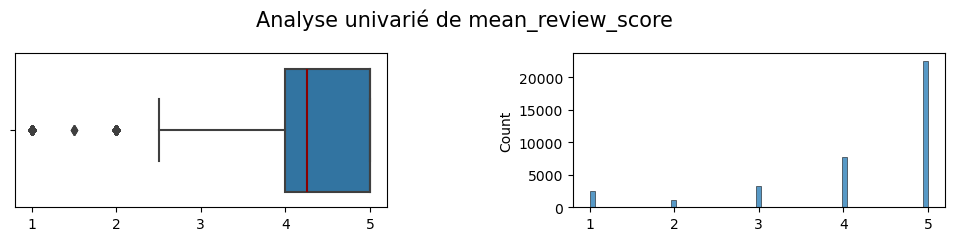

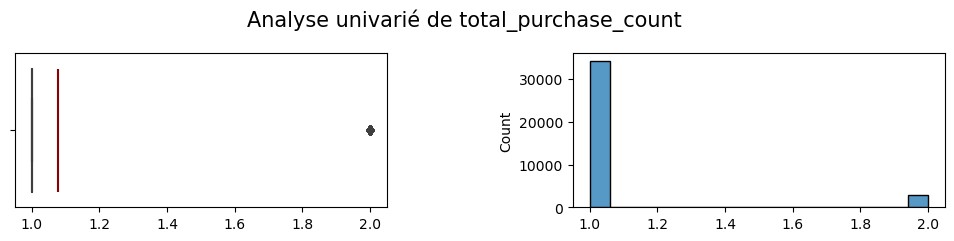

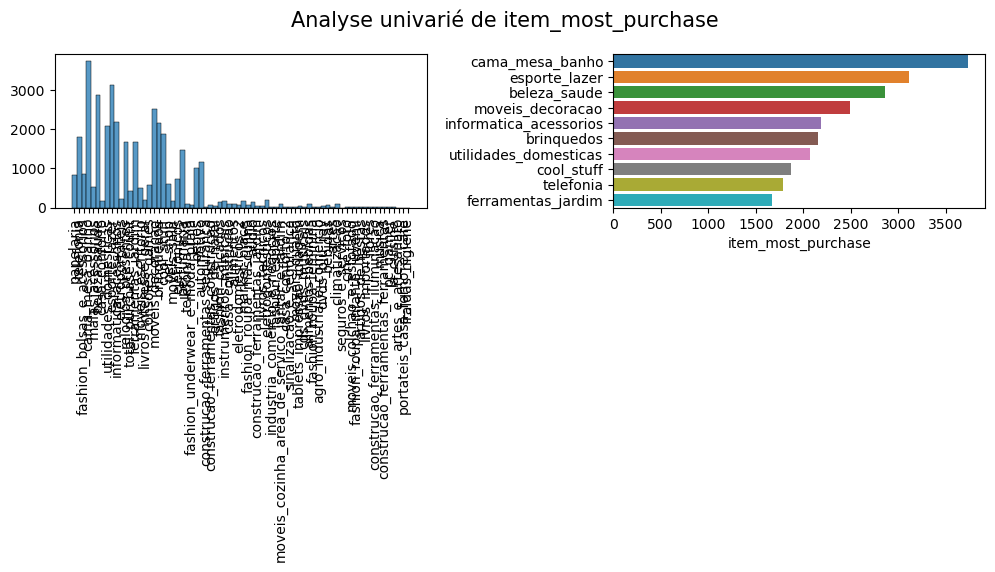

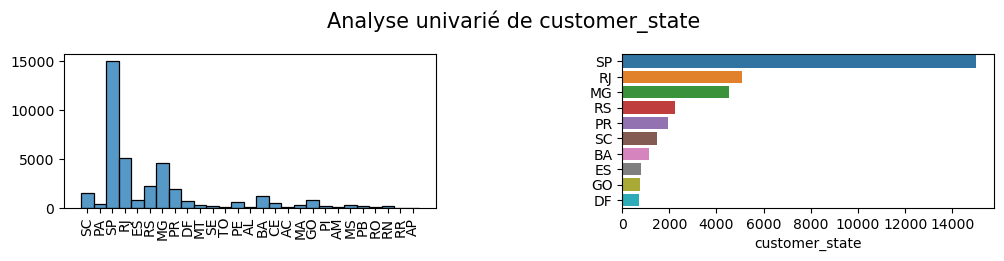

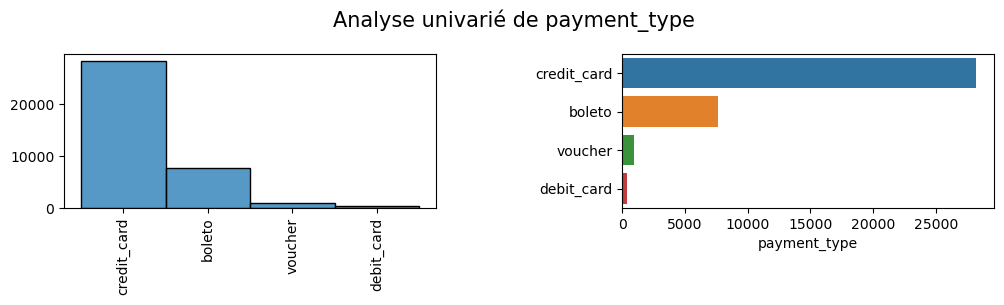

In [145]:
for c in df_if2.columns:
    if c == 'customer_unique_id':
        continue
    if (df_if2[c].dtypes == 'float64') | (df_if2[c].dtypes == 'int64'):
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
        plt.subplots_adjust(wspace=0.5)
        plt.suptitle('Analyse univarié de {}'.format(c), fontsize=15, y=1.1)
        g1 = sns.boxplot(x=c, data=df_if2, ax=ax[0])
        g1.vlines(df_if2[c].mean(), ymin=-0.4, ymax=0.4, color='darkred')
        g1.set(xlabel=None)
        g2 = sns.histplot(x=c, data=df_if2, ax=ax[1])
        g2.set(xlabel=None)
        #plt.savefig("analyse_univariee_IFR_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()
    else:
        f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,2))
        plt.subplots_adjust(wspace=0.5)
        plt.suptitle('Analyse univarié de {}'.format(c), fontsize=15, y=1.1)
        g1 = sns.histplot(x=c, data=df_if2, ax=ax[0])
        plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
        g1.set(xlabel=None, ylabel=None)
        if ('time' in c) | ('date' in c):
            temp = pd.DataFrame(df_if2[c].dt.date.value_counts())
            temp = temp.iloc[:10,:] 
        else:
            temp = pd.DataFrame(df_if2[c].value_counts())
            temp = temp.iloc[:10,:]
        g2 = sns.barplot(x=c, y=temp.index, data=temp, ax=ax[1])
        #plt.savefig("analyse_univariee_IFR_"+c+".png", bbox_inches='tight', transparent=True)
        plt.show()

##### [sommaire](#S)

## C, Sélection des features pertinentes <a class='anchor' id='IIIC'></a>

Si on applique une segmentation RFM stricte, on gardera les colonnes :
- date last purchase (recency)
- total purchase count (frequency)
- total purchase amount (monetary)

Cependant, pour ne pas perdre trop d'informations, nous allons garder d'autres features tels que :
- delivery time (durée de la livraison)
- mean review score
- item most purchase
- customer state
- payment type

In [147]:
df_if2.shape

(37218, 8)

In [131]:
df_if2 = df_if2.drop(['date_first_purchase', 'min_purchase_amount', 'max_purchase_amount', 'count_review_score'], axis=1)

In [132]:
df_if2.head(2)

,date_last_purchase,delivery_time,total_purchase_amount,mean_review_score,total_purchase_count,item_most_purchase,customer_state,payment_type
customer_unique_id,,,,,,,,
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,25.0,69.00,3.0,1,papelaria,SC,credit_card
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,20.0,25.99,4.0,1,telefonia,PA,credit_card


In [133]:
df_if2.to_csv('df_if2.csv')

In [134]:
df[df.total_purchase_amount >1000]

,date_first_purchase,date_last_purchase,delivery_time,min_purchase_amount,max_purchase_amount,total_purchase_amount,count_review_score,mean_review_score,total_purchase_count,item_most_purchase,customer_state,payment_type
customer_unique_id,,,,,,,,,,,,
00adeda9b742746c0c66e10d00ea1b74,2017-11-07 16:54:04,2017-11-07 16:54:04,7.0,629.00,1449.50,2078.50,2,1.0,2,relogios_presentes,SP,credit_card
011875f0176909c5cf0b14a9138bb691,2017-03-18 20:08:04,2017-03-18 20:08:04,5.0,3999.90,3999.90,3999.90,1,5.0,1,relogios_presentes,SP,credit_card
019ac5580a897d52e5ed6f7ed89ade27,2017-09-06 09:49:37,2017-09-06 09:49:37,12.0,429.00,429.00,1287.00,3,5.0,3,esporte_lazer,SP,boleto
0228e299d1cabeaf9be64b5ccd784c97,2017-07-21 13:24:01,2017-07-21 13:24:01,16.0,1099.00,1099.00,1099.00,1,5.0,1,relogios_presentes,MT,credit_card
0326524848da9311350236471586bd61,2017-03-01 11:44:37,2017-03-01 11:44:37,18.0,1800.00,1800.00,1800.00,1,5.0,1,esporte_lazer,SP,boleto
...,...,...,...,...,...,...,...,...,...,...,...,...
ff0ae98646e7bbb41cf0f0d3991fef98,2017-06-05 20:52:34,2017-06-05 20:52:34,10.0,2999.89,2999.89,2999.89,1,5.0,1,informatica_acessorios,BA,credit_card
ff0e4a6f3114ad1d211b885159bf1eb2,2017-04-01 10:44:01,2017-04-01 10:44:01,4.0,1654.44,1654.44,1654.44,1,5.0,1,relogios_presentes,SP,boleto
ff4159b92c40ebe40454e3e6a7c35ed6,2017-05-24 18:14:34,2017-05-24 18:14:34,11.0,6499.00,6499.00,6499.00,1,5.0,1,artes,SP,boleto


In [135]:
df_if2.total_purchase_amount.describe()

count    37218.000000
mean       103.359559
std         84.441551
min          2.290000
25%         44.990000
50%         79.900000
75%        135.000000
max        610.000000
Name: total_purchase_amount, dtype: float64

In [146]:
df[df.total_purchase_amount > 610]

,date_first_purchase,date_last_purchase,delivery_time,min_purchase_amount,max_purchase_amount,total_purchase_amount,count_review_score,mean_review_score,total_purchase_count,item_most_purchase,customer_state,payment_type
customer_unique_id,,,,,,,,,,,,
0096c18412349537abc45e350581cbbc,2017-03-14 17:33:28,2017-03-14 17:33:28,7.0,169.9,169.9,679.6,4,1.0,4,utilidades_domesticas,RS,credit_card
00adeda9b742746c0c66e10d00ea1b74,2017-11-07 16:54:04,2017-11-07 16:54:04,7.0,629.0,1449.5,2078.5,2,1.0,2,relogios_presentes,SP,credit_card
00bee19e1199bc5cede1c674177b9e22,2017-11-17 19:42:27,2017-11-17 19:42:27,25.0,649.9,649.9,649.9,1,3.0,1,cool_stuff,GO,credit_card
011875f0176909c5cf0b14a9138bb691,2017-03-18 20:08:04,2017-03-18 20:08:04,5.0,3999.9,3999.9,3999.9,1,5.0,1,relogios_presentes,SP,credit_card
0199360d5869b53eece5870f3bd1ef0e,2017-05-21 08:05:33,2017-05-21 08:05:33,4.0,740.0,740.0,740.0,1,5.0,1,beleza_saude,RS,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...
ff54194b7b7f32a428aff086b73bdf94,2017-10-08 21:42:35,2017-10-08 21:42:35,17.0,679.9,679.9,679.9,1,5.0,1,relogios_presentes,AL,credit_card
ffba9f9dff87b05e310ecc46c8591044,2017-02-27 15:39:41,2017-02-27 15:39:41,15.0,1591.2,1591.2,1591.2,1,5.0,1,relogios_presentes,PA,credit_card
ffdffea8a4b04f14987bfef2a2287fa9,2017-09-13 11:04:08,2017-09-13 11:04:08,5.0,887.0,887.0,887.0,1,5.0,1,bebes,SP,credit_card


In [142]:
data[data.price > 500]

,price,order_purchase_timestamp,order_delivered_customer_date,product_category_name,review_score,customer_unique_id,customer_state,payment_type
7,810.00,2018-07-04 12:08:27,2018-07-09 14:04:07,ferramentas_jardim,5,fda4476abb6307ab3c415b7e6d026526,SP,credit_card
16,639.00,2018-04-25 09:10:41,2018-04-30 17:54:25,consoles_games,4,6062db572f3ef38b7a8ff4307abbfad3,SP,credit_card
39,809.10,2017-04-06 22:16:10,2017-05-23 08:32:07,informatica_acessorios,1,98758d88bf4b8eef1372ddee45d63178,AL,credit_card
151,540.00,2018-03-08 16:01:59,2018-03-20 22:27:30,relogios_presentes,5,96fab6e511253d619ab79a63c31b29c4,SP,boleto
256,579.00,2018-05-25 09:47:21,2018-06-07 00:18:30,portateis_casa_forno_e_cafe,4,ead67853687963974dfd6a3c23072deb,MG,credit_card
...,...,...,...,...,...,...,...,...
108291,1150.00,2017-11-25 15:48:04,2017-12-08 17:26:55,utilidades_domesticas,5,4e1cce07cd5937c69dacac3c8b13d965,SP,credit_card
108429,599.99,2018-04-29 23:57:11,2018-05-04 22:31:59,relogios_presentes,3,e271fa40aa8fea4e0f304b3768b65d6a,SP,credit_card
108440,535.00,2017-08-29 11:34:11,2017-09-13 20:40:10,consoles_games,4,fed1227e08fb9852b896221a0932ffeb,SP,credit_card
108563,525.00,2017-06-11 13:29:42,2017-06-21 15:48:45,ferramentas_jardim,5,f16a7418dca2619d9524be10babfeb5f,GO,credit_card


##### [sommaire](#S)

##### fin de page <a class='anchor' id='fdp'></a>